In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

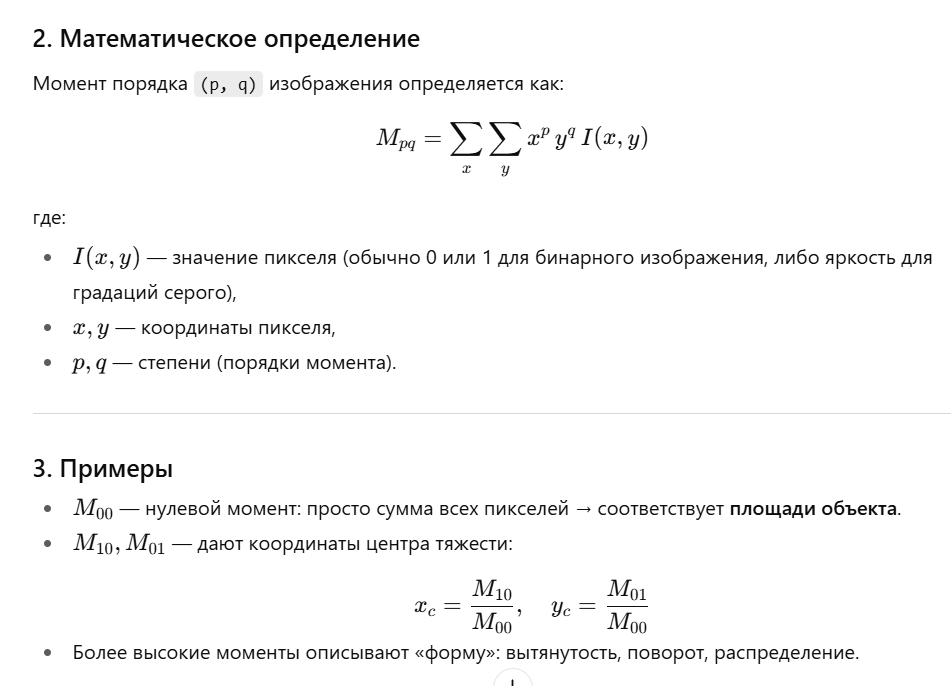

In [22]:
img = cv.imread('../../img/light.png', cv.IMREAD_GRAYSCALE)
print(img.shape)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

(225, 225)
{'m00': 2675.0, 'm10': 278912.5, 'm01': 279134.1666666666, 'm20': 30151011.333333332, 'm11': 30036047.666666664, 'm02': 30366469.0, 'm30': 3369540626.65, 'm21': 3348401198.0666666, 'm12': 3371036430.133333, 'm03': 3435974822.9500003, 'mu20': 1069821.555295948, 'mu11': 931745.5132398754, 'mu02': 1239036.10254414, 'mu30': 2711782.6906375885, 'mu21': 7867230.361898735, 'mu12': 10381551.729693353, 'mu03': 8672528.059790134, 'nu20': 0.14950777259791392, 'nu11': 0.1302116185853612, 'nu02': 0.17315553883052004, 'nu30': 0.007327324384387904, 'nu21': 0.02125751044409238, 'nu12': 0.028051287958800766, 'nu03': 0.023433450824132104}


In [35]:
print(len(contours))

1


In [23]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cx, cy

(104, 104)

In [24]:
area = cv.contourArea(cnt)
perimeter = cv.arcLength(cnt,True)

area, perimeter

(2675.0, 335.445739030838)

In [25]:
epsilon = 0.1*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

In [26]:
hull = cv.convexHull(cnt)
hull

array([[[ 97,  65]],

       [[ 98,  66]],

       [[109,  80]],

       [[115,  88]],

       [[133, 114]],

       [[155, 153]],

       [[155, 155]],

       [[153, 155]],

       [[150, 154]],

       [[148, 153]],

       [[109, 132]],

       [[102, 128]],

       [[ 80, 107]],

       [[ 57,  84]],

       [[ 57,  82]],

       [[ 63,  79]],

       [[ 83,  70]],

       [[ 90,  67]],

       [[ 95,  65]]], dtype=int32)

In [27]:
k = cv.isContourConvex(cnt)
k

False

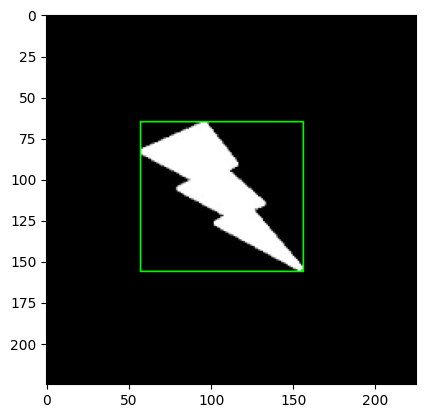

In [28]:
x,y,w,h = cv.boundingRect(cnt)
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_rect = cv.rectangle(img_color,(x,y),(x+w,y+h),(0,255,0),1)
plt.imshow(img_rect)

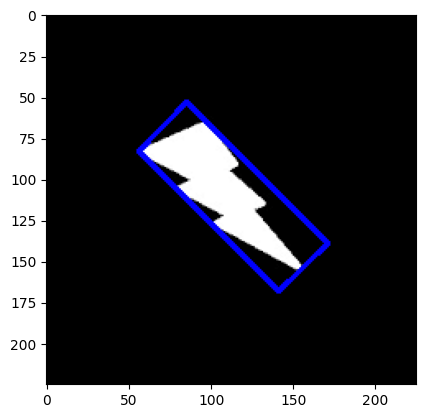

In [30]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.intp(box)

img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
plt.imshow(cv.drawContours(img_color,[box],0,(0,0,255),2))

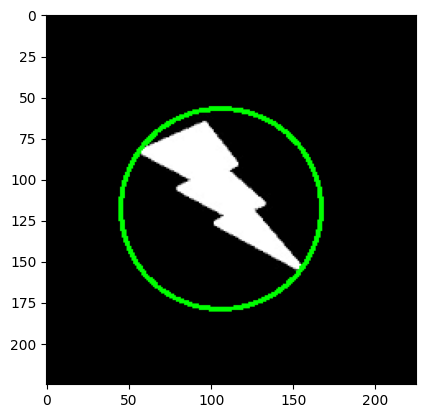

In [31]:
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
plt.imshow(cv.circle(img_color,center,radius,(0,255,0),2))

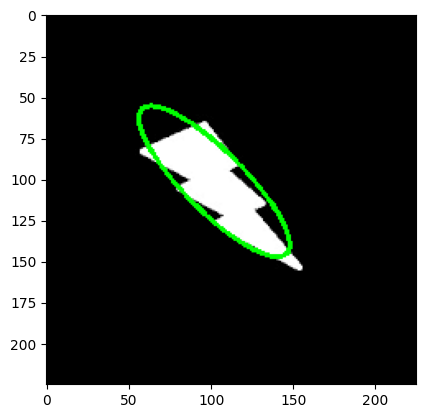

In [32]:
ellipse = cv.fitEllipse(cnt)
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
plt.imshow(cv.ellipse(img_color,ellipse,(0,255,0),2))

C:\Users\Alexander\AppData\Local\Temp\ipykernel_28512\579609409.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x*vy/vx) + y)
C:\Users\Alexander\AppData\Local\Temp\ipykernel_28512\579609409.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-x)*vy/vx)+y)


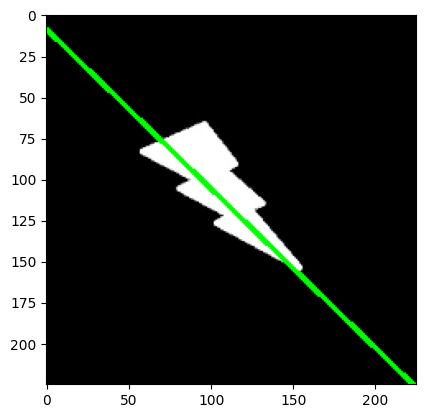

In [33]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
plt.imshow(cv.line(img_color,(cols-1,righty),(0,lefty),(0,255,0),2))